In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
car = pd.read_excel("Clean_data.xlsx")
car.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244


In [3]:
num_df = car[['Engine Size(L)','Cylinders','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]
num_df.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


# Checking Correlation

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Engine Size(L)'),
  Text(1.5, 0, 'Cylinders'),
  Text(2.5, 0, 'Fuel Consumption Comb (L/100 km)'),
  Text(3.5, 0, 'CO2 Emissions(g/km)')])

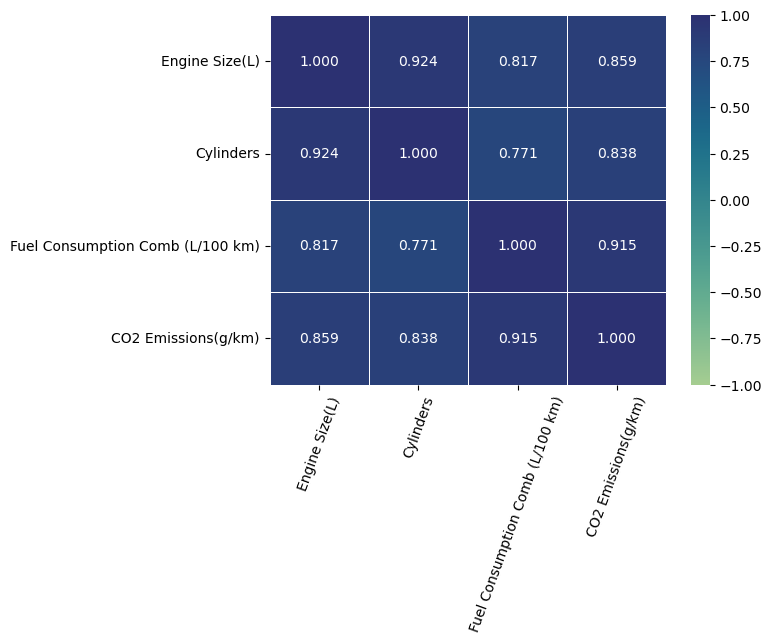

In [4]:
ax = sns.heatmap(num_df.corr(), vmin=-1, vmax=1,center=0, annot =True,fmt=".3f",cmap="crest", linewidth=.5)
plt.xticks(rotation = 70)

# Feature Selection For Modeling

In [5]:
x_data = num_df[['Engine Size(L)','Cylinders','Fuel Consumption Comb (L/100 km)']]
y_data = num_df[['CO2 Emissions(g/km)']]

In [14]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split the dataset for training and testing 

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)
print(x_train.shape[0])
print(y_test.shape[0])

2173
932


# Converting to Polynomial Features

In [8]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

# Ridge Regression

In [9]:
rig = Ridge(alpha=2)
rig.fit(x_train_pr,y_train)
rig_pr = rig.predict(x_test_pr)
print(r2_score(y_test,rig_pr))

0.9427713556022425


# Linear Regression

In [10]:
lr = LinearRegression()
lr.fit(x_train_pr,y_train)
lr_pr = lr.predict(x_test_pr)
print(r2_score(y_test,lr_pr))

0.9063025328588706


# KNN

In [11]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(x_train_pr,y_train)
knn_pr = knn.predict(x_test_pr)
print(r2_score(y_test,knn_pr))

0.9389736751586324


# Random Forest

In [12]:
rf = RandomForestRegressor(random_state=42)
y_train = np.squeeze(y_train)
rf.fit(x_train_pr, y_train)
rf_pr = rf.predict(x_test_pr)
print(r2_score(y_test,rf_pr))

0.9658960490299919


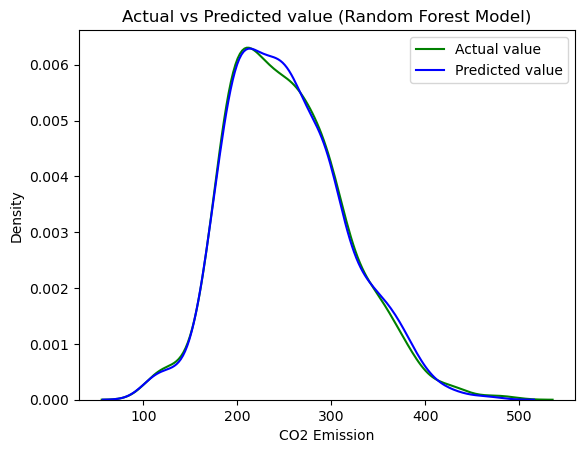

In [13]:
y_test = y_test.squeeze() # Converting it to series
ax1=sns.kdeplot(y_test,color='green',label= 'Actual value')
sns.kdeplot(rf_pr,color='blue',label= 'Predicted value',ax=ax1)
plt.title("Actual vs Predicted value (Random Forest Model)")
plt.xlabel('CO2 Emission')
plt.ylabel('Density')
plt.legend()

# Conclusion

By the above results we have seen that Random forest gives the best accuracy of 0.97